In [1]:
# 1.1 – Assicurati di aver installato requirements.txt e di avere training.py nel working dir
import os
from pathlib import Path
import json

# riduci la dimensione massima dei blocchi allocati per evitare frammentazione
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"
import torch
import matplotlib.pyplot as plt

import sys

sys.path.append(str(Path().resolve()))

from training import run_lora_train

import gradio as gr
chatbot = gr.Chatbot(type="messages")

import matplotlib.image as mpimg



In [2]:
import sys
print("sys.executable =", sys.executable)


sys.executable = C:\Users\jinet\anaconda3\envs\whisperGPUNuovo\python.exe


In [3]:
try:
    import numpy as _np
    print("NumPy version:", _np.__version__)
except ImportError:
    raise RuntimeError("NumPy non è installato nel tuo Python. Installa con `pip install numpy`.")


NumPy version: 1.26.4


In [4]:
import pandas as pd
print("pandas __path__:", pd.__path__)


pandas __path__: ['C:\\Users\\jinet\\anaconda3\\envs\\whisperGPUNuovo\\lib\\site-packages\\pandas']


In [5]:
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))
    print("Current device index:", torch.cuda.current_device())
    print("Allocated (MB):", torch.cuda.memory_allocated(0) / 1024**2)
    print("Cached    (MB):", torch.cuda.memory_reserved(0)  / 1024**2)

CUDA available: True
Device name: NVIDIA GeForce RTX 3070 Laptop GPU
Current device index: 0
Allocated (MB): 1274.49072265625
Cached    (MB): 1402.0


In [6]:
# 2. Quick‐Experiment: LoRA su sottoinsieme

# Configurazione esperimento rapido
BASE_TRAIN = "data/splits/train.json"
SUBSET_FILE = "experiments/train_subset_500.json"
with open(BASE_TRAIN, "r", encoding="utf-8") as f:
    records = json.load(f)

# creiamo subset di 500 esempi
subset = records[:500]
Path("data/splits").mkdir(exist_ok=True, parents=True)
with open(SUBSET_FILE, "w", encoding="utf-8") as f:
    json.dump(subset, f, ensure_ascii=False, indent=2)

print(f"Subset con {len(subset)} esempi salvato in {SUBSET_FILE}")


Subset con 500 esempi salvato in experiments/train_subset_500.json


[LoRA] Esempi da experiments/train_subset_500.json: 500


C:\Users\jinet\anaconda3\envs\whisperGPUNuovo\lib\site-packages\transformers\models\auto\tokenization_auto.py:902: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


[LoRA] Train/Val sizes = 475/25
[LoRA] Dataset tokenization debug salvato in lora_dataset_debug.csv


Map:   0%|          | 0/475 [00:00<?, ? examples/s]

Map:   0%|          | 0/25 [00:00<?, ? examples/s]

loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": 

[LoRA] Device: cuda
[LoRA] ⚙️  Preparazione caricamento modello…


Multi-backend validation successful.
Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in 8-bit or 4-bit. Pass your own torch_dtype to specify the dtype of the remaining non-linear layers or pass torch_dtype=torch.float16 to remove this warning.
loading weights file model.safetensors from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\model.safetensors.index.json
Instantiating LlamaForCausalLM model under default dtype torch.float16.
Generate config GenerationConfig {
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ]
}

target_dtype {target_dtype} is replaced by `CustomDtype.INT4` for 4-bit BnB quantization
Multi-backend validation successful.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

All model checkpoint weights were used when initializing LlamaForCausalLM.

All the weights of LlamaForCausalLM were initialized from the model checkpoint at meta-llama/Llama-3.2-3B-Instruct.
If your task is similar to the task the model of the checkpoint was trained on, you can already use LlamaForCausalLM for predictions without further training.
loading configuration file generation_config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\generation_config.json
Generate config GenerationConfig {
  "bos_token_id": 128000,
  "do_sample": true,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "temperature": 0.6,
  "top_p": 0.9
}

PyTorch: setting up devices


[LoRA] ✅ from_pretrained in 16.7s
[LoRA] ✅ device mapping completato in 0.0s
>>> Parametri che richiedono grad (112):
    base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight
    base_model.model.model.layers.1.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.1.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.1.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.1.self_attn.v_proj.lora_B.default.weight
    base_model.model.model.layers.2.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.2.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.2.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.2.self_attn.v_proj.lora

Using auto half precision backend
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
Currently training with a batch size of: 1
***** Running training *****
  Num examples = 475
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 4
  Total optimization steps = 119
  Number of trainable parameters = 2,293,760


Step,Training Loss,Validation Loss,Accuracy
50,5.732700,2.022326,0.766250
100,0.975900,0.671696,0.917500



***** Running Evaluation *****
  Num examples = 25
  Batch size = 1

***** Running Evaluation *****
  Num examples = 25
  Batch size = 1
Saving model checkpoint to experiments\sweep_t0.5_lr5e-05\checkpoint-119
loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.

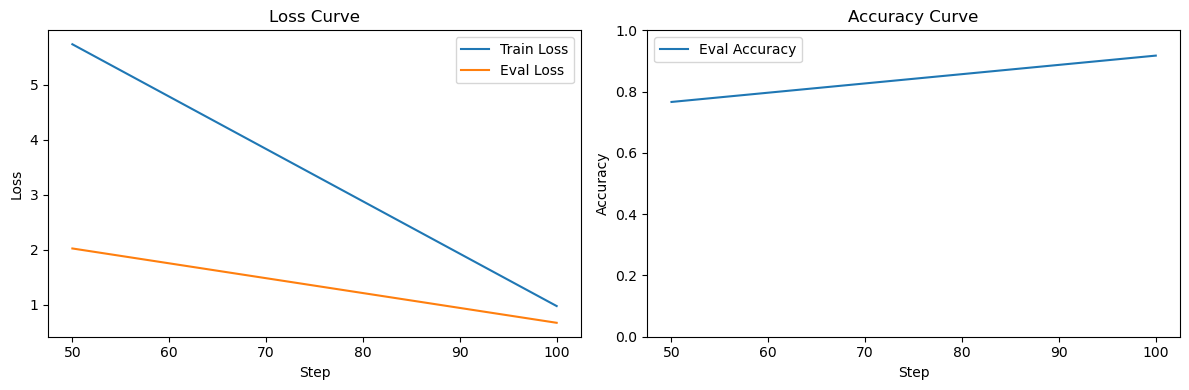

[LoRA] Subplots salvati in experiments\sweep_t0.5_lr5e-05\lora_subplots.png
[LoRA] Perplexity finale (train): 2.65


loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": 

[LoRA] Adapter LoRA e tokenizer salvati in experiments\sweep_t0.5_lr5e-05
[LoRA] Esempi da experiments/train_subset_500.json: 500


C:\Users\jinet\anaconda3\envs\whisperGPUNuovo\lib\site-packages\transformers\models\auto\tokenization_auto.py:902: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
loading file tokenizer.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\tokenizer.json
loading file tokenizer.model from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\special_tokens_map.json
loading file tokenizer_config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\tokenizer_config.json
loading file chat_template.jinja from cache 

[LoRA] Train/Val sizes = 475/25
[LoRA] Dataset tokenization debug salvato in lora_dataset_debug.csv


Map:   0%|          | 0/475 [00:00<?, ? examples/s]

Map:   0%|          | 0/25 [00:00<?, ? examples/s]

loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": 

[LoRA] Device: cuda
[LoRA] ⚙️  Preparazione caricamento modello…


Generate config GenerationConfig {
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ]
}

target_dtype {target_dtype} is replaced by `CustomDtype.INT4` for 4-bit BnB quantization
Multi-backend validation successful.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

All model checkpoint weights were used when initializing LlamaForCausalLM.

All the weights of LlamaForCausalLM were initialized from the model checkpoint at meta-llama/Llama-3.2-3B-Instruct.
If your task is similar to the task the model of the checkpoint was trained on, you can already use LlamaForCausalLM for predictions without further training.
loading configuration file generation_config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\generation_config.json
Generate config GenerationConfig {
  "bos_token_id": 128000,
  "do_sample": true,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "temperature": 0.6,
  "top_p": 0.9
}

PyTorch: setting up devices


[LoRA] ✅ from_pretrained in 16.3s
[LoRA] ✅ device mapping completato in 0.0s
>>> Parametri che richiedono grad (112):
    base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight
    base_model.model.model.layers.1.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.1.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.1.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.1.self_attn.v_proj.lora_B.default.weight
    base_model.model.model.layers.2.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.2.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.2.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.2.self_attn.v_proj.lora

Using auto half precision backend
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
Currently training with a batch size of: 1
***** Running training *****
  Num examples = 475
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 4
  Total optimization steps = 119
  Number of trainable parameters = 2,293,760


Step,Training Loss,Validation Loss,Accuracy
50,3.445900,0.637111,0.920937
100,0.570000,0.558839,0.921875



***** Running Evaluation *****
  Num examples = 25
  Batch size = 1

***** Running Evaluation *****
  Num examples = 25
  Batch size = 1
Saving model checkpoint to experiments\sweep_t0.5_lr0.0001\checkpoint-119
loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32

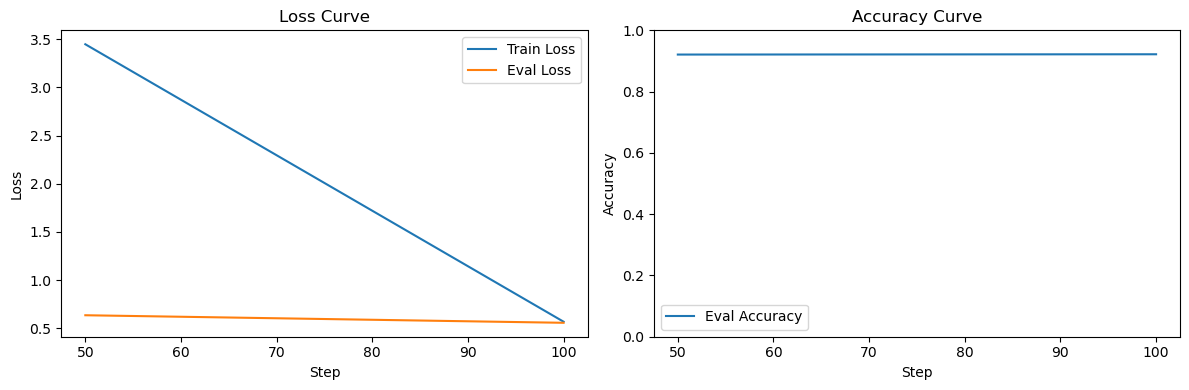

[LoRA] Subplots salvati in experiments\sweep_t0.5_lr0.0001\lora_subplots.png
[LoRA] Perplexity finale (train): 1.77


loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": 

[LoRA] Adapter LoRA e tokenizer salvati in experiments\sweep_t0.5_lr0.0001
[LoRA] Esempi da experiments/train_subset_500.json: 500


C:\Users\jinet\anaconda3\envs\whisperGPUNuovo\lib\site-packages\transformers\models\auto\tokenization_auto.py:902: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
loading file tokenizer.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\tokenizer.json
loading file tokenizer.model from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\special_tokens_map.json
loading file tokenizer_config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\tokenizer_config.json
loading file chat_template.jinja from cache 

[LoRA] Train/Val sizes = 475/25
[LoRA] Dataset tokenization debug salvato in lora_dataset_debug.csv


Map:   0%|          | 0/475 [00:00<?, ? examples/s]

Map:   0%|          | 0/25 [00:00<?, ? examples/s]

[LoRA] Device: cuda
[LoRA] ⚙️  Preparazione caricamento modello…


loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": 

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

All model checkpoint weights were used when initializing LlamaForCausalLM.

All the weights of LlamaForCausalLM were initialized from the model checkpoint at meta-llama/Llama-3.2-3B-Instruct.
If your task is similar to the task the model of the checkpoint was trained on, you can already use LlamaForCausalLM for predictions without further training.
loading configuration file generation_config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\generation_config.json
Generate config GenerationConfig {
  "bos_token_id": 128000,
  "do_sample": true,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "temperature": 0.6,
  "top_p": 0.9
}

PyTorch: setting up devices


[LoRA] ✅ from_pretrained in 19.7s
[LoRA] ✅ device mapping completato in 0.0s
>>> Parametri che richiedono grad (112):
    base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight
    base_model.model.model.layers.1.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.1.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.1.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.1.self_attn.v_proj.lora_B.default.weight
    base_model.model.model.layers.2.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.2.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.2.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.2.self_attn.v_proj.lora

Using auto half precision backend
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
Currently training with a batch size of: 1
***** Running training *****
  Num examples = 475
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 4
  Total optimization steps = 119
  Number of trainable parameters = 2,293,760


Step,Training Loss,Validation Loss,Accuracy
50,5.732700,2.022326,0.766250
100,0.975900,0.671696,0.917500



***** Running Evaluation *****
  Num examples = 25
  Batch size = 1

***** Running Evaluation *****
  Num examples = 25
  Batch size = 1
Saving model checkpoint to experiments\sweep_t0.8_lr5e-05\checkpoint-119
loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.

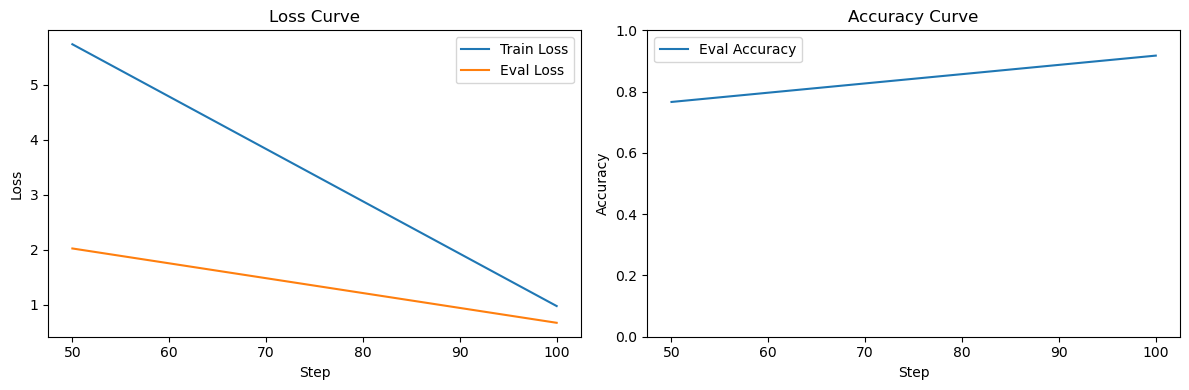

[LoRA] Subplots salvati in experiments\sweep_t0.8_lr5e-05\lora_subplots.png
[LoRA] Perplexity finale (train): 2.65


loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": 

[LoRA] Adapter LoRA e tokenizer salvati in experiments\sweep_t0.8_lr5e-05
[LoRA] Esempi da experiments/train_subset_500.json: 500


C:\Users\jinet\anaconda3\envs\whisperGPUNuovo\lib\site-packages\transformers\models\auto\tokenization_auto.py:902: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
loading file tokenizer.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\tokenizer.json
loading file tokenizer.model from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\special_tokens_map.json
loading file tokenizer_config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\tokenizer_config.json
loading file chat_template.jinja from cache 

[LoRA] Train/Val sizes = 475/25
[LoRA] Dataset tokenization debug salvato in lora_dataset_debug.csv


Map:   0%|          | 0/475 [00:00<?, ? examples/s]

Map:   0%|          | 0/25 [00:00<?, ? examples/s]

[LoRA] Device: cuda
[LoRA] ⚙️  Preparazione caricamento modello…


loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": 

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

All model checkpoint weights were used when initializing LlamaForCausalLM.

All the weights of LlamaForCausalLM were initialized from the model checkpoint at meta-llama/Llama-3.2-3B-Instruct.
If your task is similar to the task the model of the checkpoint was trained on, you can already use LlamaForCausalLM for predictions without further training.
loading configuration file generation_config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\generation_config.json
Generate config GenerationConfig {
  "bos_token_id": 128000,
  "do_sample": true,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "temperature": 0.6,
  "top_p": 0.9
}

PyTorch: setting up devices


[LoRA] ✅ from_pretrained in 17.9s
[LoRA] ✅ device mapping completato in 0.0s
>>> Parametri che richiedono grad (112):
    base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight
    base_model.model.model.layers.1.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.1.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.1.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.1.self_attn.v_proj.lora_B.default.weight
    base_model.model.model.layers.2.self_attn.q_proj.lora_A.default.weight
    base_model.model.model.layers.2.self_attn.q_proj.lora_B.default.weight
    base_model.model.model.layers.2.self_attn.v_proj.lora_A.default.weight
    base_model.model.model.layers.2.self_attn.v_proj.lora

Using auto half precision backend
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
Currently training with a batch size of: 1
***** Running training *****
  Num examples = 475
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 4
  Total optimization steps = 119
  Number of trainable parameters = 2,293,760


Step,Training Loss,Validation Loss,Accuracy
50,3.445900,0.637111,0.920937
100,0.570000,0.558839,0.921875



***** Running Evaluation *****
  Num examples = 25
  Batch size = 1

***** Running Evaluation *****
  Num examples = 25
  Batch size = 1
Saving model checkpoint to experiments\sweep_t0.8_lr0.0001\checkpoint-119
loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32

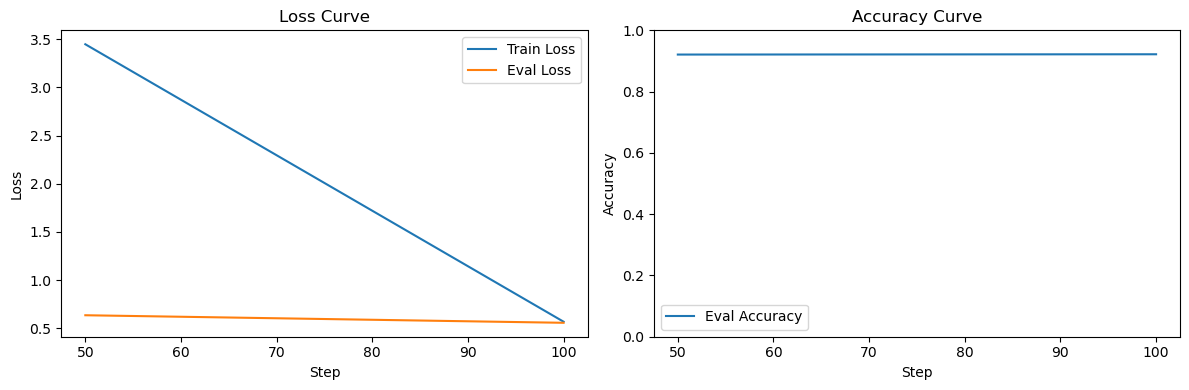

[LoRA] Subplots salvati in experiments\sweep_t0.8_lr0.0001\lora_subplots.png
[LoRA] Perplexity finale (train): 1.77


loading configuration file config.json from cache at C:\Users\jinet\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct\snapshots\0cb88a4f764b7a12671c53f0838cd831a0843b95\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": 

[LoRA] Adapter LoRA e tokenizer salvati in experiments\sweep_t0.8_lr0.0001


In [7]:
for temp in [0.5, 0.8]:
    for lr in [5e-5, 1e-4]:
        tag = f"t{temp}_lr{lr}"
        out = Path(f"experiments/sweep_{tag}"); out.mkdir(exist_ok=True, parents=True)
        run_lora_train(
            train_file   = SUBSET_FILE,
            output_dir   = str(out),
            model_name   = "meta-llama/Llama-3.2-3B-Instruct",
            seed         = 123,
            use_4bit     = False,
            batch_size   = 1,
            learning_rate= lr,
            num_train_epochs=1,
        )



 Risultati per sweep_t0.5_lr0.0001:


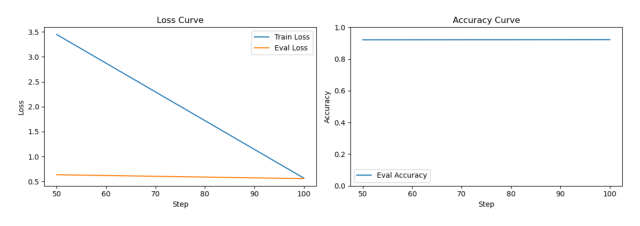

 Risultati per sweep_t0.5_lr5e-05:


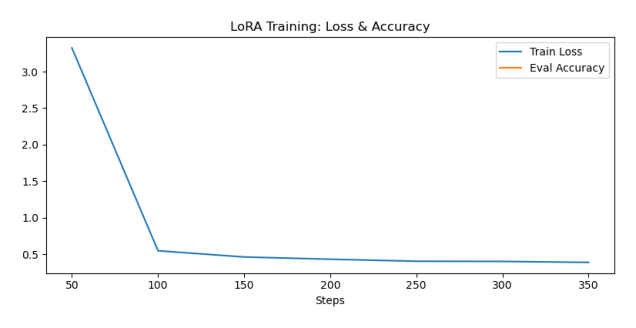

 Risultati per sweep_t0.8_lr0.0001:


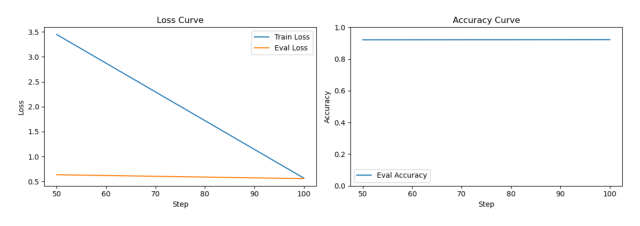

 Risultati per sweep_t0.8_lr5e-05:


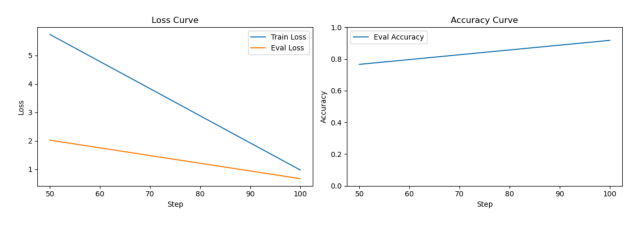

In [8]:
# 4. Caricamento e visualizzazione dei plot dai diversi sweep
"""
Esempio di loop rapido su 2 temperature e 2 learning rate, per 1 epoca sola.
"""

# 1) Trova tutte le cartelle di sweep
exp_root   = Path("experiments")
sweep_dirs = sorted([d for d in exp_root.iterdir() if d.name.startswith("sweep_")])

if not sweep_dirs:
    print(" Nessuna cartella sweep_ trovata in experiments/")
else:
    # 2) Per ogni sweep, cerca il plot e mostralo
    for d in sweep_dirs:
        # prova a trovare i due tipi di plot che hai generato:
        candidates = list(d.glob("**/lora_loss_acc_curve.png")) + \
                     list(d.glob("**/lora_subplots.png"))
        if not candidates:
            print(f" Nessun plot trovato in {d}")
            continue

        fig_path = candidates[0]
        # titolo
        print(f" Risultati per {d.name}:")
        # carica e mostra immagine
        img = mpimg.imread(str(fig_path))
        plt.figure(figsize=(8,4))
        plt.imshow(img)
        plt.axis("off")
        plt.show()


## 📝 5. Conclusioni preliminari

- **Subset training**: time per epoca ~ X minuti
- **Curve**: trend di loss, over/underfitting
- **Param Sweeps**: quale combo (temp, lr) dà loss più bassa?

> *Qui annota direttamente nel notebook i tuoi commenti mentre guardi i grafici e i numeri.*
